In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

def show_orignal_images(pixels):
	fig, axes = plt.subplots(6, 10, figsize=(11, 7),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
		ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
	plt.show()

def show_eigenfaces(pca):
	fig, axes = plt.subplots(3, 8, figsize=(9, 4),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
		ax.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
		ax.set_title("PC " + str(i+1))
	plt.show()

In [75]:
df = pd.read_csv('face_data.csv')
print(df.head())

          0         1         2         3         4         5         6  \
0  0.309917  0.367769  0.417355  0.442149  0.528926  0.607438  0.657025   
1  0.454545  0.471074  0.512397  0.557851  0.595041  0.640496  0.681818   
2  0.318182  0.400826  0.491736  0.528926  0.586777  0.657025  0.681818   
3  0.198347  0.194215  0.194215  0.194215  0.190083  0.190083  0.243802   
4  0.500000  0.545455  0.582645  0.623967  0.648760  0.690083  0.694215   

          7         8         9  ...      4087      4088      4089      4090  \
0  0.677686  0.690083  0.685950  ...  0.669422  0.652893  0.661157  0.475207   
1  0.702479  0.710744  0.702479  ...  0.157025  0.136364  0.148760  0.152893   
2  0.685950  0.702479  0.698347  ...  0.132231  0.181818  0.136364  0.128099   
3  0.404959  0.483471  0.516529  ...  0.636364  0.657025  0.685950  0.727273   
4  0.714876  0.723140  0.731405  ...  0.161157  0.177686  0.173554  0.177686   

       4091      4092      4093      4094      4095  target  
0  0.1

In [76]:
labels = df['target']
pixels = df.drop('target', axis=1)

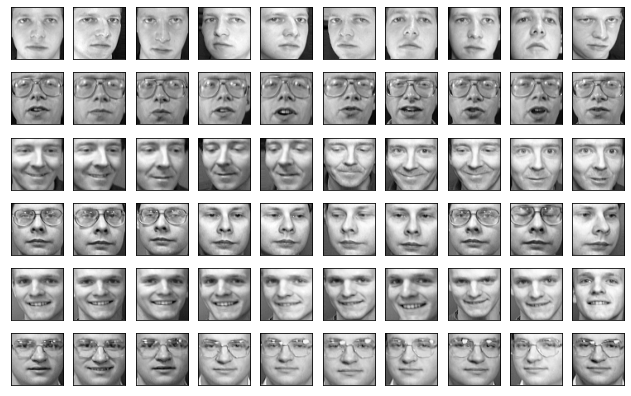

In [77]:
show_orignal_images(pixels)

In [78]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(pixels)
pixels = imp.transform(pixels)
xtrain, xtest, ytrain, ytest = train_test_split(pixels, labels)

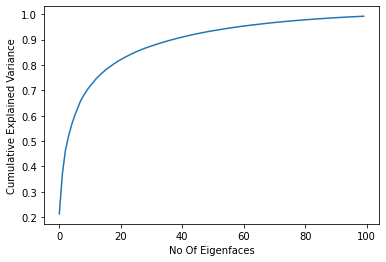

In [79]:
pca = PCA(n_components=100).fit(xtrain)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No Of Eigenfaces')
plt.ylabel('Cumulative Explained Variance')
plt.show()

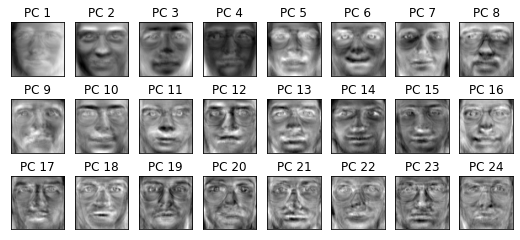

In [80]:
show_eigenfaces(pca)

In [81]:
XTrain_pca = pca.transform(xtrain)
XTest_pca = pca.transform(xtest)

# #check if ytrain has any nan values and fill them with 0
print(np.isnan(ytrain).any())
ytrain = ytrain.fillna(0)


True


In [82]:
%%capture
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression()
]
#send output to a file
import sys
orig_stdout = "./output.txt"
for clf in classifiers:
    clf.fit(XTrain_pca, ytrain)
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    print('****Results****')
    train_predictions = clf.predict(XTest_pca)
    acc = clf.score(XTest_pca, ytest)
    print("Accuracy: {:.4%}".format(acc))
    print(classification_report(ytest, train_predictions))